In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
import pickle
import os
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold

In [2]:
sns.set_style('darkgrid')

In [3]:
train=pd.read_csv('./data/train.csv')
train.shape

(188318, 132)

In [6]:
test=pd.read_csv('./data/test.csv')
test.select_dtypes(include='number')

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,0.321594,0.299102,0.246911,0.402922,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,0.634734,0.620805,0.654310,0.946616,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,0.290813,0.737068,0.711159,0.412789,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,0.268622,0.681761,0.592681,0.354893,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,0.553846,0.299102,0.263570,0.696873,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125541,587617,0.458463,0.245921,0.654310,0.284048,0.281143,0.438917,0.815941,0.39455,0.48740,0.40666,0.550529,0.538473,0.298734,0.345946
125542,587621,0.304143,0.488789,0.549770,0.267727,0.674529,0.346948,0.424968,0.47669,0.25753,0.26894,0.324486,0.352251,0.490001,0.290576
125543,587627,0.899689,0.555782,0.484196,0.594598,0.794794,0.808958,0.511502,0.72299,0.94438,0.83510,0.933174,0.926619,0.848129,0.808125
125544,587629,0.329232,0.358319,0.484196,0.373816,0.302678,0.372125,0.388545,0.31796,0.32128,0.36974,0.307628,0.301921,0.608259,0.361542


In [4]:
train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [137]:
train.select_dtypes('O').shape

(188318, 116)

In [138]:
train.select_dtypes(include='number').shape

(188318, 16)

<Axes: >

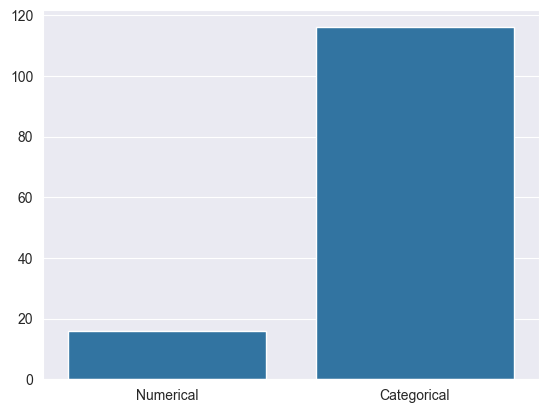

In [139]:
sns.barplot(x=['Numerical',"Categorical"],y=[16,116])

In [140]:
train.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


We Notice that almost all the continious vlaues seems standardized between 0 to 1 with sismilar range of values.i.e. similar range of mean and std. deviation values.

In [141]:
total_rows=train.shape[0]


In [4]:
column_dtype=train.dtypes 
cat_cols=list(train.select_dtypes(include='object'))
cont_cat=list(train.select_dtypes(include='number'))
cont_cat.remove('loss')

In [5]:
cont_cat.remove('id')

In [6]:
type(cont_cat)

list

In [6]:
with open("../artifacts/cont_data.txt",'w') as file:
    file.write(','.join(cont_cat))

In [7]:
with open('../artifacts/cat_data.txt','w') as file:
    file.write(','.join(cat_cols))

#### Exploring Null values.

In [8]:
train.isnull().sum().sum()

60

We can see we have a total of 60 values missing in the dateset.

In [9]:
train.drop_duplicates(inplace=True)
            

#### Exploring Categorical Type data

<Axes: >

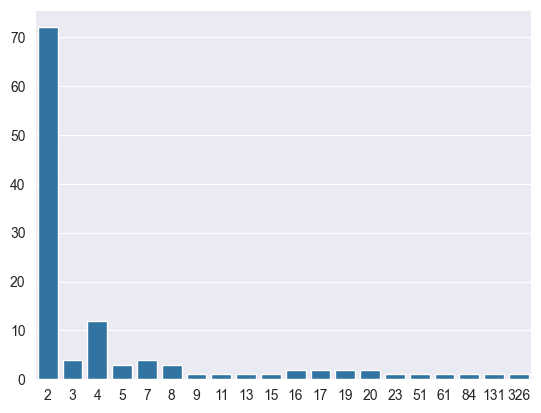

In [146]:
mp = {}
for cat in cat_cols:
    nunique = train[cat].nunique()  # Get number of unique values
    if mp.get(nunique) is None:  # Check if the key exists
        mp[nunique] = 1
    else:
        mp[nunique] += 1

sns.barplot(x=list(mp.keys()), y=list(mp.values()))


We see that  most of the categorical columns are bivariate in nature.

#### Exploring the Continious data.

<Axes: >

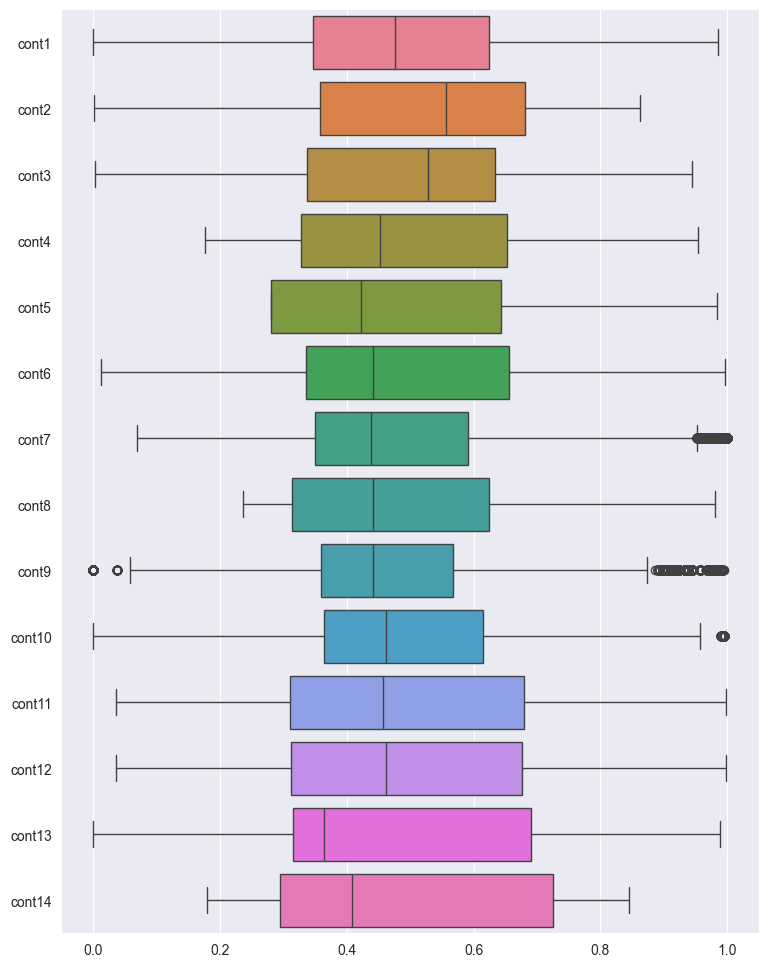

In [147]:
plt.figure(figsize=(9,12))
sns.boxplot(train[cont_cat],orient='h')

We can observe that some of the continious variable have outliers.

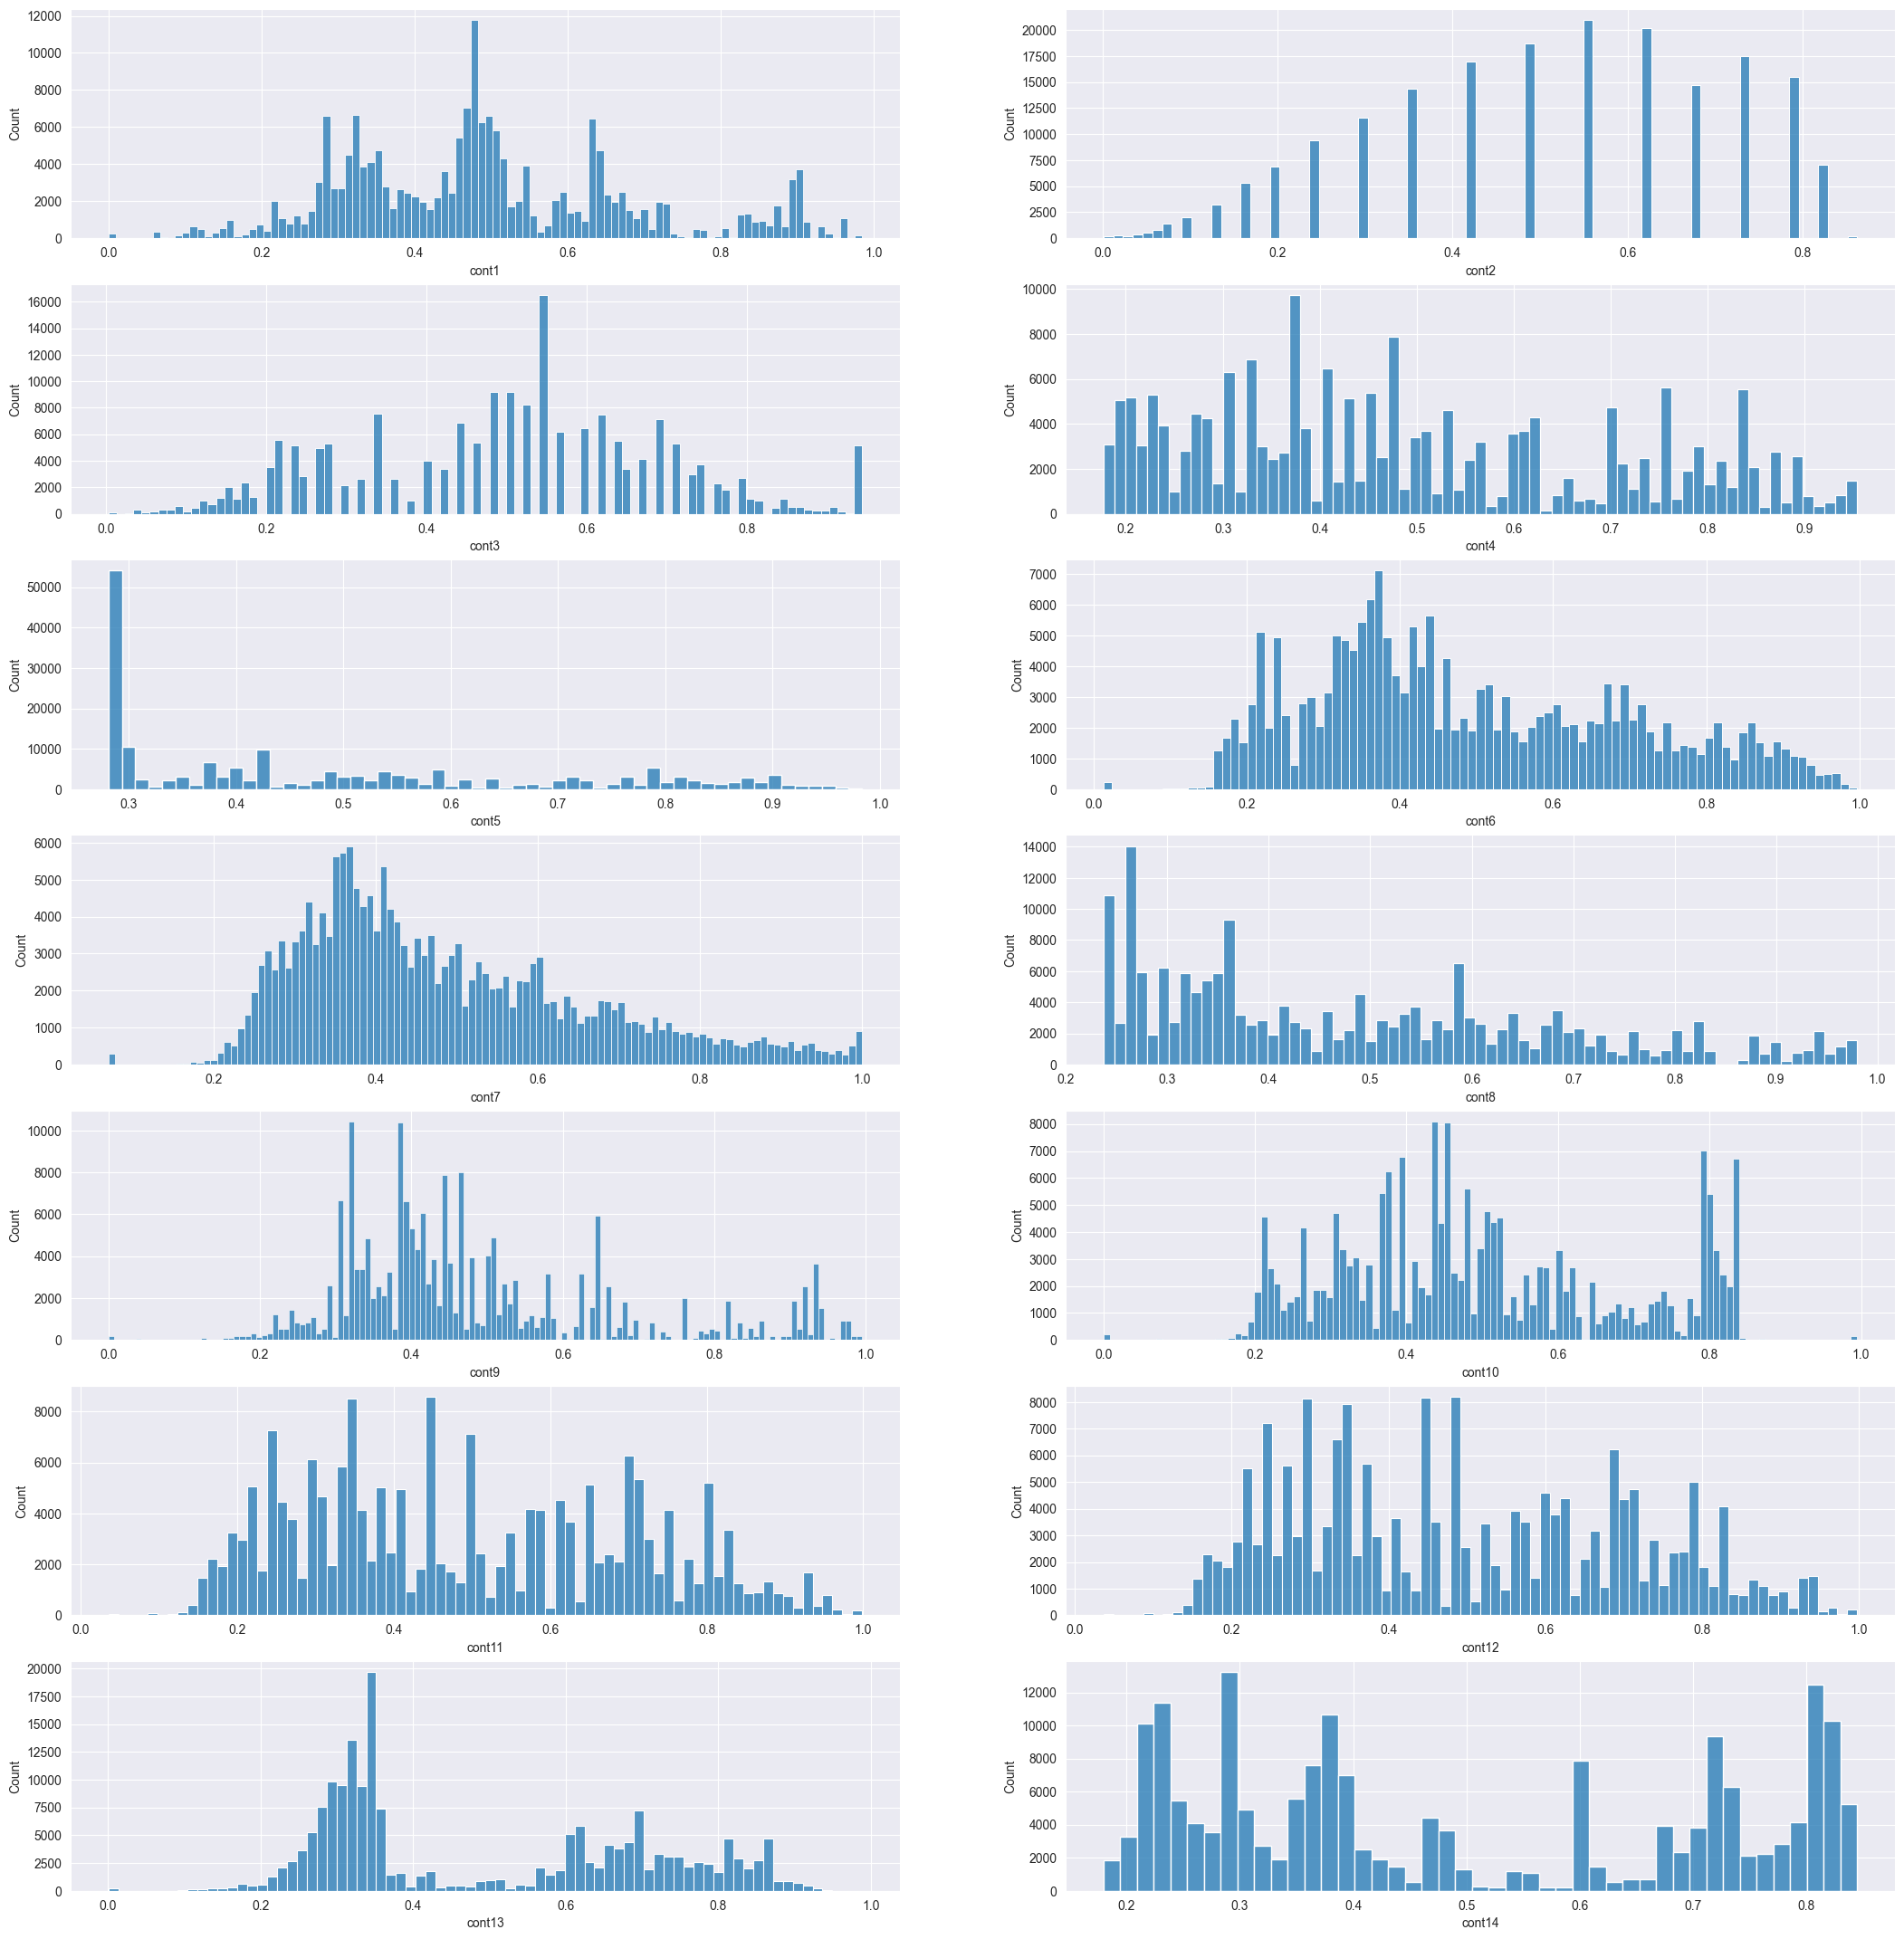

In [148]:
cnt=0
fig,axes=plt.subplots(nrows= 7,ncols=2,figsize=(26,27))
for i in range(7):
    for j in range(2):
        ax=axes[i][j]
        sns.histplot(train[cont_cat[cnt]],ax=ax)
        cnt+=1

### Correlation between Categorical Variables

In [10]:
output_dir="../artifacts/label_encoders"
for col in cat_cols:
    le=LabelEncoder()
    le.fit(train[col])

    file_name=col+'.pkl'
    file_path=os.path.join(output_dir,file_name)
    with open(file_path,'wb') as f:
        pickle.dump(le,f)
    train[col]=le.transform(train[col])

In [11]:
df = []
for cat in cat_cols:
    unique_value_count = len(train[cat].unique())
    df.append({'Column_Name': cat, "Count":int(unique_value_count)})
df=pd.DataFrame(df)
columns_unique_value = np.array(df.Count.value_counts().index)

In [12]:
columns_unique_value

array([  2,   3,   4,   7,   8,   5,  16,  19,  20,  11,  23,  61,  51,
       131,  84,  13,  17,  18,   9,  15,   6, 326], dtype=int64)

In [13]:
columns_to_drop_cat = set()
correlated_columns = dict()
# find unique value in the array 'columns_unique_value'
for unique_value_count in columns_unique_value:
    if unique_value_count>1: # if >1 - no need to compute Chi-Square Test
        categorical_columns = df.loc[df.Count==unique_value_count,'Column_Name']
        categorical_columns = categorical_columns.reset_index(drop=True)
        columns_length=len(categorical_columns)
        for col in range(columns_length-1):
            column_to_compare = categorical_columns[col]
            columns_compare_against = categorical_columns[(col+1):columns_length]
            chi_scores = chi2(train[columns_compare_against],train[column_to_compare])
            if column_to_compare not in columns_to_drop_cat:
                # if chi_scores less than 0.05 then reject the null, there is relationship between variable
                columns_to_be_dropped = [i for i in range(len(columns_compare_against)) if chi_scores[1][i]<=0.05]
                #  if null rejected, add it to columns_to_drop_array 
                columns_to_drop_array = np.array(columns_compare_against)[columns_to_be_dropped]
                correlated_columns[column_to_compare]=columns_to_drop_array
                columns_to_drop_cat.update(columns_to_drop_array)

### Correlation between continious variables.

PCA

In [30]:
from sklearn.decomposition import PCA

In [154]:
sc=StandardScaler()
train_num_std=sc.fit_transform(train[cont_cat])

In [155]:
pca=PCA(n_components=None)
train_num_pca=pca.fit_transform(train_num_std)
varExp=pca.explained_variance_ratio_

([<matplotlib.axis.YTick at 0x1a608d8db40>,
 [Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8'),
  Text(0, 0.9, '0.9'),
  Text(0, 1.0, '1.0')])

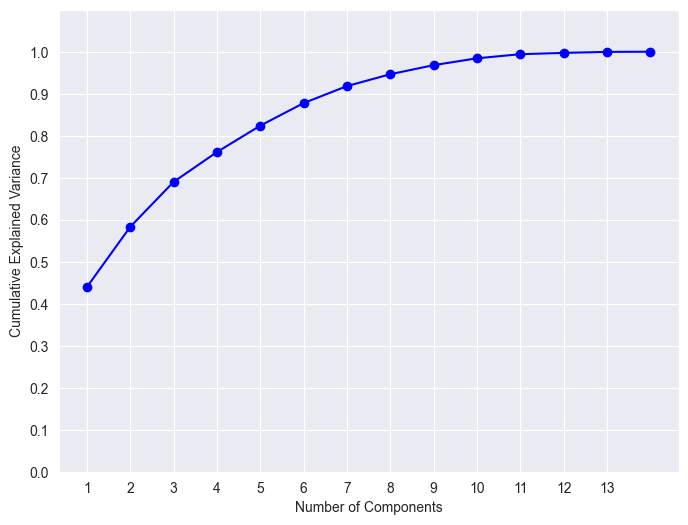

In [156]:
cumVarExplained = []
nb_components = []
counter = 1
for i in varExp:
    cumVarExplained.append(varExp[0:counter].sum())
    nb_components.append(counter)
    counter += 1

plt.subplots(figsize=(8, 6))
plt.plot(nb_components, cumVarExplained, 'bo-')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylim([0.0, 1.1])
plt.xticks(np.arange(1, len(nb_components), 1.0))
plt.yticks(np.arange(0.0, 1.1, 0.10))

In [31]:
def feature_selection_numerical_variables(train,qthreshold,corr_threshold):

    numerical_columns = cont_cat
    
    # features that we can eliminate from the dataset
    #remove variables with constant variance
    constant_filter = VarianceThreshold(threshold=0)
    constant_filter.fit(train[numerical_columns])
    constant_columns = [column for column in train[numerical_columns].columns 
                    if column not in train[numerical_columns].columns[constant_filter.get_support()]]
    if len(constant_columns)>0:
        train.drop(labels=constant_columns, axis=1, inplace=True)
        # if constant_column > 0, then there is constant variable in dataset and it will be drop

    #remove deleted columns from dataframe
    numerical_columns = [column for column in numerical_columns if column not in constant_columns]
        
    #remove variables with qconstant variance
    #Remove quasi-constant variables
    qconstant_filter = VarianceThreshold(threshold=qthreshold)
    qconstant_filter.fit(train[numerical_columns])
    qconstant_columns = [column for column in train[numerical_columns].columns 
                         if column not in train[numerical_columns].columns[constant_filter.get_support()]]
    if len(qconstant_columns)>0:
        train.drop(labels=qconstant_columns, axis=1, inplace=True)
    
    #remove deleted columns from dataframe
    numerical_columns = [column for column in numerical_columns if column not in qconstant_columns]
    
    
    #Identify and remove correlated variables
    correlated_features = set()
    correlation_matrix = train[numerical_columns].corr()
    ax = sns.heatmap(
    correlation_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right');
    #print(correlation_matrix)
    
    # eliminationg variable with correlation
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > corr_threshold:
                colname = correlation_matrix.columns[i]
                colcompared = correlation_matrix.columns[j]
                #check if the column compared against is not in the columns excluded list
                if colcompared not in correlated_features:
                    correlated_features.add(colname)
    train.drop(labels=correlated_features, axis=1, inplace=True)
    
    return train,constant_columns,qconstant_columns,correlated_features

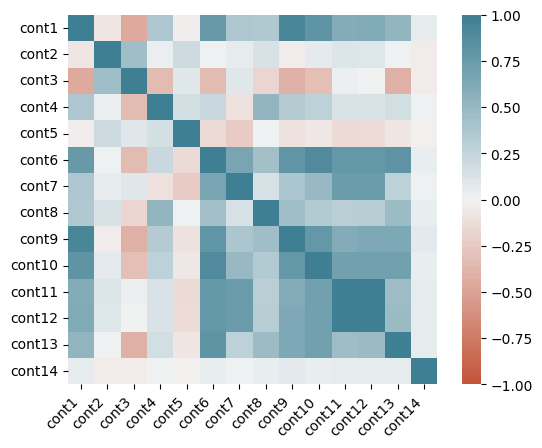

In [32]:
train1,constant_columns,qconstant_columns,correlated_features =feature_selection_numerical_variables(train,0.01,0.75)

In [33]:
correlated_features

{'cont10', 'cont12', 'cont6', 'cont9'}

In [35]:
final_drop_list=list(correlated_features)+list(columns_to_drop_cat)
final_drop_df=pd.DataFrame(final_drop_list,columns=["Columns"])
final_drop_df.to_csv('../artifacts/columns_to_drop.csv',index=False)

### Exploring target variable

<Axes: xlabel='loss', ylabel='Density'>

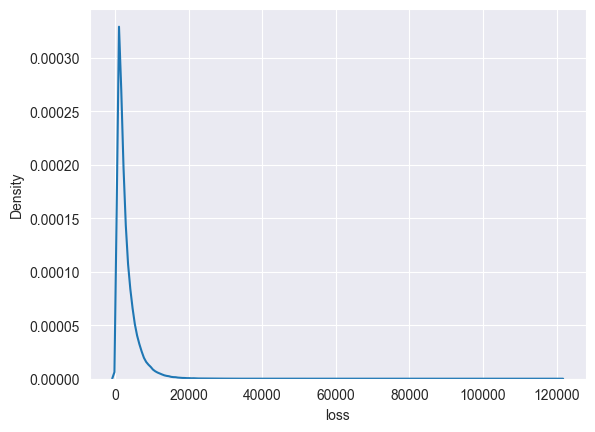

In [9]:
sns.kdeplot(train['loss'])

As we can see, a lot of observations are cramped in a small region. We also observe that the target variable is distributed in an exponential manner.
We can apply logrithmic function to have a more spread out distribution.

<Axes: xlabel='loss', ylabel='Density'>

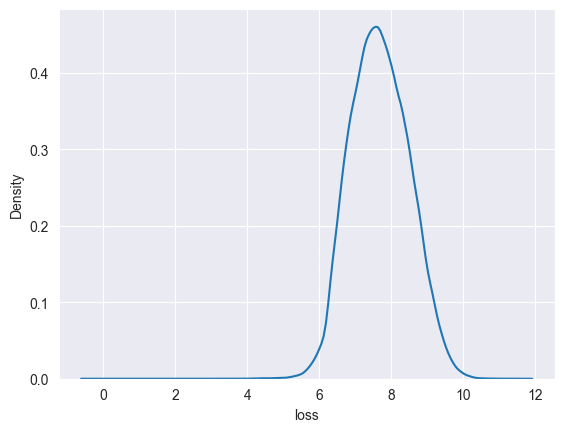

In [11]:
train['loss']=np.log(train['loss'])
sns.kdeplot(train['loss'])